In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import solve

# Лабораторная работа 3
Вариант 4 

Сутдент: Волков Матвей Андреевич 

группа: М8О-307Б-19  

### Часть 3_1

#### Задание: 
Используя таблицу значений $Y_i$ функции y = f(x), вычисленных в точках $X_i$ построить интерполяционные многочлены Лагранжа и Ньютона, проходящие через точки {Xi, Yi}.  Вычислить значение погрешности интерполяции в точке  $X^*$.

Функция:  y = ctg(x)

$$ a) \ \  X_i = \frac{\pi}{8}, \frac{2\pi}{8}, \frac{3\pi}{8}, \frac{4\pi}{8} $$
$$ б) \ \  X_i = \frac{\pi}{8}, \frac{5\pi}{16}, \frac{3\pi}{8}, \frac{\pi}{2} $$
$$ X^{*} = \frac{\pi}{3}  $$

In [22]:
#задаем параметры задачи

#pi для удобства написания
pi = math.pi
# y = ctg(x)
task_function = lambda x: 1/np.tan(x)

#X^*
task_function_value_point = pi/3
#X_i a)
Xi_a = [pi/8, 2*pi/8, 3*pi/8, pi/2]
#X_i b)
Xi_b = [pi/8, 5*pi/16, 3*pi/8, pi/2]

Интерполяционным многочленом Лагранжа называется многочлен
$$L_n(x) = \sum^n_{i=0}f_i \prod\limits_{j=0, j\neq i} \frac{x-x_i}{x_i - x_j}$$

In [23]:
class Lagrange:
    def __init__(self, Xi, f):
        """Создает класс Лагранжевого многочлена

        Args:
            Xi (list(float)): значения в варианте
            f (lambda): функция в варианте
        """
        self.X = Xi
        self.f = f
        self.Y = [f(x) for x in Xi]

    def calculate_function_in_point(self, x) -> float:
        """Функция считает многочлен Лагранжа в точке x

        Args:
            x (float): точка, в которой надо считать многочлен

        Returns:
            float: Искомое значение
        """
        L = 0
        for j in range(len(self.X)):
            li = 1
            for i in range(len(self.X)):
                if j != i : 
                    li *= (x - self.X[i])
                    li /= (self.X[j] - self.X[i])

            L += self.f(self.X[j])*li
        return L
    
    def show_polynom(self) -> str:
        """Функция показывает полином в виде строки

        Returns:
            str: Искомый полином
        """
        s = 'L(x) = '
        for j in range(len(self.X)):
            li = ''
            li_ = 1
            for i in range(len(self.X)):
                if j != i : 
                    li += f"(x - {self.X[i]:.{2}f})"
                    li_ *= (self.X[j] - self.X[i])

            s += f"{self.f(self.X[j]):.{2}f} * " + li + f"/ {li_:.{2}f} "
            if j < len(self.X) - 1:
                s += "+ "
            s += "\n"
        return s

    def show_plot(self, countPoint):
        #предпосчитываем точки для графика
        X = np.linspace(self.X[0],  self.X[-1], num=countPoint)
        Y = [self.calculate_function_in_point(x) for x in X]
        
        plt.scatter(self.X, self.Y, c='r')
        # лининия данной в задании
        plt.plot(X, self.f(X), c='r', label="ctg(x)")
        # лининия полученная в многочлене
        plt.plot(X,Y, c='b', label="Lagrange")
        plt.legend()

        plt.show()


a) L(x) = 2.41 * (x - 0.79)(x - 1.18)(x - 1.57)/ -0.36 + 
1.00 * (x - 0.39)(x - 1.18)(x - 1.57)/ 0.12 + 
0.41 * (x - 0.39)(x - 0.79)(x - 1.57)/ -0.12 + 
0.00 * (x - 0.39)(x - 0.79)(x - 1.18)/ 0.36 

fanction value in X* = 0.5579748085542388
Погрешность: 0.0193754606353872


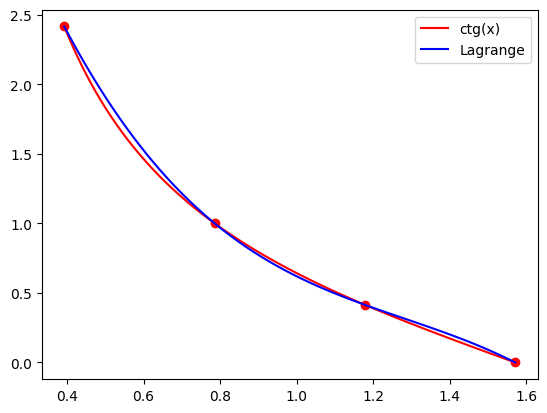

b) L(x) = 2.41 * (x - 0.98)(x - 1.18)(x - 1.57)/ -0.55 + 
0.67 * (x - 0.39)(x - 1.18)(x - 1.57)/ 0.07 + 
0.41 * (x - 0.39)(x - 0.98)(x - 1.57)/ -0.06 + 
0.00 * (x - 0.39)(x - 0.98)(x - 1.18)/ 0.27 

fanction value in X* = 0.5579748085542388
Погрешность: 0.0038548965315180483


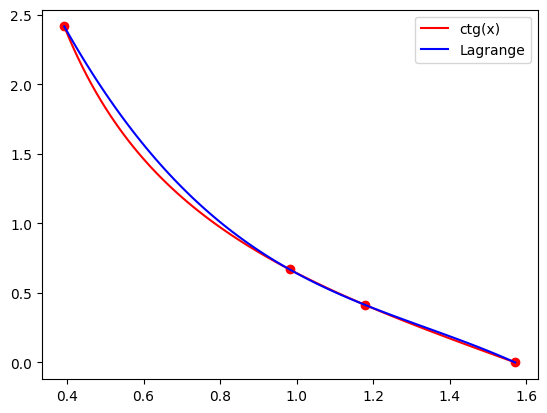

In [24]:
l_var1 = Lagrange(Xi_a, task_function)
print(f"a) {l_var1.show_polynom()}")
print(f"fanction value in X* = {l_var1.calculate_function_in_point(task_function_value_point)}")
print(f'Погрешность: {abs(l_var1.calculate_function_in_point(task_function_value_point) - task_function(task_function_value_point))}')
l_var1.show_plot(100)

l_var2 = Lagrange(Xi_b, task_function)
print(f"b) {l_var2.show_polynom()}")
print(f"fanction value in X* = {l_var1.calculate_function_in_point(task_function_value_point)}")
print(f'Погрешность: {abs(l_var2.calculate_function_in_point(task_function_value_point) - task_function(task_function_value_point))}')
l_var2.show_plot(100)

Интерполяционным многочленом Ньютона называется многочлен
$$P_n(x) = f(x_0) + (x - x_0)f(x_1,x_0) + ... + (x- x0)(x-x_1)...(x-x_n)f(x_0,x_1,...,x_n)$$
Где
$$f(x_i,x_j) = \frac{f_i - f_j}{x_i - x_j}$$
$$f(x_i,x_j,...,x_{n}) = \frac{f(x_i,x_j,...,x_{n-1}) - f(x_j,...,x_{n})}{x_i - x_n}$$

In [25]:
class Newton:
    def __init__(self, Xi, f):
        """Создает класс Ньютоновского многочлена

        Args:
            Xi (list(float)): значения в варианте
            f (lambda): функция в варианте
        """
        self.X = Xi
        self.f = f
        self.Y = [f(x) for x in Xi]

    def divided_difference(self, x):
        if len(x) == 1:
            return self.f(x[0])
        return (self.divided_difference(x[:-1]) - self.divided_difference(x[1:])) / (x[0] - x[-1])

    def calculate_function_in_point(self, x) -> float:
        """Функция считает многочлен Ньютона в точке x

        Args:
            x (float): точка, в которой надо считать многочлен

        Returns:
            float: Искомое значение
        """
        result = self.f(self.X[0])
        for i in range(1, len(self.X)):
            tmp_result = 1
            for j in range(i):
                tmp_result *= (x - self.X[j])
            result += self.divided_difference(self.X[:i + 1]) * tmp_result

        return result
    
    def show_polynom(self) -> str:
        """Функция показывает полином в виде строки

        Returns:
            str: Искомый полином
        """
        result = f'N(x) = {self.f(self.X[0]):.2f} + '
        for i in range(1, len(self.X)):
            tmp_result = ''
            for j in range(i):
                tmp_result += f'(x - {self.X[j]:.{2}f})'

            result += f"{self.divided_difference(self.X[:i+1]):.2f} * {tmp_result} "
            if j < len(self.X) - 1:
                result += "+ "
            result += "\n"
            
        return result

    def show_plot(self, countPoint):
        #предпосчитываем точки для графика
        X = np.linspace(self.X[0],  self.X[-1], num=countPoint)
        Y = [self.calculate_function_in_point(x) for x in X]
        
        plt.scatter(self.X, self.Y, c='r')
        # лининия данной в задании
        plt.plot(X, self.f(X), c='r', label="ctg(x)")
        # лининия полученная в многочлене
        plt.plot(X,Y, c='b', label="Newton")
        plt.legend()

        plt.show()


a) N(x) = 2.41 + -3.60 * (x - 0.39) + 
2.69 * (x - 0.39)(x - 0.79) + 
-1.81 * (x - 0.39)(x - 0.79)(x - 1.18) + 

fanction value in X* = 0.5579748085542388
Погрешность: 0.0193754606353872


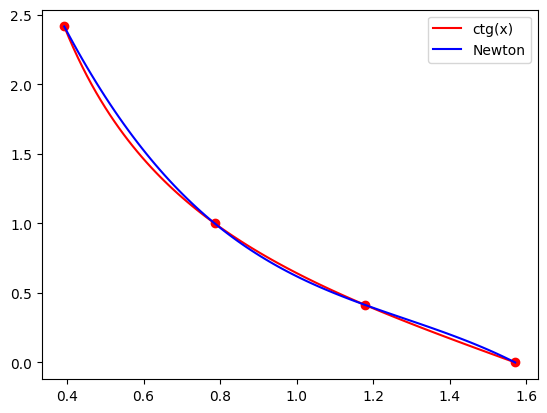

b) L(x) = 2.41 * (x - 0.98)(x - 1.18)(x - 1.57)/ -0.55 + 
0.67 * (x - 0.39)(x - 1.18)(x - 1.57)/ 0.07 + 
0.41 * (x - 0.39)(x - 0.98)(x - 1.57)/ -0.06 + 
0.00 * (x - 0.39)(x - 0.98)(x - 1.18)/ 0.27 

fanction value in X* = 0.5579748085542388
Погрешность: 0.0038548965315182704


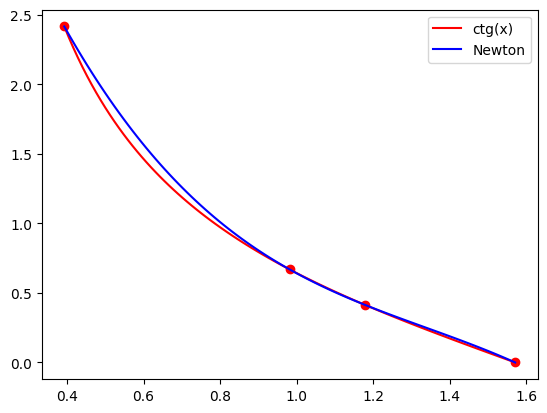

In [26]:
n_var1 = Newton(Xi_a, task_function)
print(f"a) {n_var1.show_polynom()}")
print(f"fanction value in X* = {n_var1.calculate_function_in_point(task_function_value_point)}")
print(f'Погрешность: {abs(n_var1.calculate_function_in_point(task_function_value_point) - task_function(task_function_value_point))}')
n_var1.show_plot(100)

n_var2 = Newton(Xi_b, task_function)
print(f"b) {l_var2.show_polynom()}")
print(f"fanction value in X* = {n_var1.calculate_function_in_point(task_function_value_point)}")
print(f'Погрешность: {abs(n_var2.calculate_function_in_point(task_function_value_point) - task_function(task_function_value_point))}')
n_var2.show_plot(100)

### Часть 3_2

#### Задание: 
Построить кубический сплайн для функции, заданной в узлах интерполяции, предполагая, что сплайн имеет нулевую кривизну при x = x0 и x = x4 . Вычислить значение функции в точке x = X* .

| i | 0 | 1 | 2 | 3 | 4 |
|:------:|:------:|:------:|:------:|:------:|:------:|
| $x_i$ | 1.0 | 1.9 | 2.8 | 3.7 | 4.6 |
| $f_i$ | 2.4142 | 1.0818 | 0.50953 | 0.11836 | -0.24008 |


$$ X^{*} = 2.66666667  $$

In [27]:
n = 4
X_i = [1.0, 1.9, 2.8, 3.7, 4.6]
f_i = [2.4142, 1.0818, 0.50953, 0.11836, -0.24008]
task_function_value_point_2 = 2.66666667

Для построения кубического сплайна необходимо решить систему уравнений вида:
$$2(h_1+h_2)c_2 + h_2c_3 = 3[\frac{f_2-f_1}{h_2} - \frac{f_1-f_0}{h_1}]$$
$$h_{i-1}c_{i-1} + 2(h_{i-1}+h_i)c_i + h_ic_{i+1} = 3[\frac{f_i-f_{i-1}}{h_i} - \frac{f_{i-1}-f_{i-2}}{h_{i-1}}], i = 3,...,n-1$$
$$h_{n-1}c_{n-1} + 2(h_{n-1}+h_n)c_n = 3[\frac{f_n-f_{n-1}}{h_n} - \frac{f_{i-1}-f_{i-2}}{h_{i-1}}]$$

посчитаем для удобства $h_i = x_i - x_{i-1}$

In [28]:
# нужно, для 1-ой индексации
h = [0]
for i in range(1, len(X_i)):
    h.append(X_i[i] - X_i[i - 1])

In [29]:
#начнем инициализировать нашу систему 
A = [[2 * (h[1] + h[2]) , h[2] , 0]]
_d = [3 * ((f_i[2] - f_i[1]) / h[2]  - (f_i[1] - f_i[0]) / h[1] )]

#заполним часть системы для i = 3 ... n-1
for i in range(3, n):
    next_row_A = [0]*len(A[0])
    next_row_A[i-3] = h[i-1]
    next_row_A[i-2] = 2*(h[i-1] + h[i])
    next_row_A[i-1] = h[i]
    A.append(next_row_A)

    _d.append(3 * ((f_i[i] - f_i[i - 1]) / h[i]  - (f_i[i - 1] - f_i[i - 2]) / h[i-1]))

#заполним часть системы для i = n
next_row_A = [0]*len(A[0])
next_row_A[-1] = 2 * (h[n - 1] + h[n])
next_row_A[-2] = h[n - 1]
A.append(next_row_A)

_d.append(3 * ((f_i[n] - f_i[n - 1]) / h[n]  - (f_i[n - 1] - f_i[n - 2]) / h[n-1]))

#продемонстрируем результат полученной матрицы A
print("Трехдиагональная матрица:")
for val in A:
    print(["{0:0.2f}".format(i) for i in val])

Трехдиагональная матрица:
['3.60', '0.90', '0.00']
['0.90', '3.60', '0.90']
['0.00', '0.90', '3.60']


In [30]:
#TRIDIAGONAL_MATRIX_ALGORITHM
def TDMAsolver(A, _d) -> np.array:
    n = len(_d)
    a = []
    b = []
    c = []
    d = _d
    ACopy = A

    a.append(0)
    b.append(ACopy[0][0])
    c.append(ACopy[0][1])
    for i in range(1, n - 1):
        a.append(ACopy[i][i - 1])
        b.append(ACopy[i][i])
        c.append(ACopy[i][i + 1])

    a.append(ACopy[n - 1][n - 2])
    b.append(ACopy[n - 1][n - 1])
    c.append(0)

    # creating P and Q
    p = [-c[0]/b[0]]
    q = [d[0]/b[0]]
    for i in range(1, n - 1):
        p.append(- c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))

    #ans
    ans = np.zeros(n)
    ans[n - 1] = (d[n - 1] - a[n - 1] * q[n - 2]) / (b[n - 1] + a[n - 1] * p[n - 2])

    for i in range(n - 2, -1, -1):
        ans[i] = p[i] * ans[i + 1] + q[i]

    return ans

Теперь найдем оставшиеся коэфициенты, которые равны:
$$a_i = f_{i-1}, i = 1,..,n$$
$$b_i = \frac{f_i - f_{i-1}}{h_i} - \frac{1}{3} h_i(c_{i+1} + 2c_i), i = 1,..,n-1$$
$$d_i = \frac{c_{i+1}-c_i}{3h_i}, i = 1,..,n-1$$
$$c_1=0,$$
$$b_n = \frac{f_n - f_{n-1}}{h_n} - \frac{2}{3}h_n c_n, $$
$$d_n = -\frac{c_n}{3h_n}$$

In [31]:
c = [0] + TDMAsolver(A,_d).tolist()
a = f_i[:-1]

b = [ (f_i[i] - f_i[i - 1])/h[i] - (1/3) * h[i] * (c[i] + 2 * c[i - 1]) for i  in range(1, n)]
b.append((f_i[n] - f_i[n - 1])/h[n] - (2/3) * h[n] * c[n - 1] )

d = [ (c[i] - c[i - 1]) / (3 * h[i]) for i  in range(1, n)]
d.append( -c[n - 1] / (3 * h[n]))

print("a:", a)
print("b:", b)
print("c:", c)
print("d:", d)

a: [2.4142, 1.0818, 0.50953, 0.11836]
b: [-1.6929500000000002, -1.0554333333333337, -0.43421666666666664, -0.41916666666666663]
c: [0, 0.7083518518518519, -0.01811111111111075, 0.034833333333332966]
d: [0.2623525377229081, -0.26906035665294914, 0.01960905349794211, -0.012901234567901106]


Уравнение кубического сплайна
$$S(x) = a_i + b_i(x-x_{i-1}) + c_i(x-x_{i-1})^2 + d_i(x - x_{i-1})^3$$

In [32]:
def S(x, a, b, c, d, X):
    for i in range(1, len(X)):
        if x >= X[i - 1] and x <= X[i]:
            return a[i-1] + b[i-1] * (x - X[i - 1]) + c[i-1] * (x - X[i - 1])**2 + d[i-1] * (x - X[i - 1])**3

In [33]:
def triple_spline_plot(Xi, Yi, X, Y, t1 = ''):
    """Функция построения графика для визуализации получившегося кубического сплайна

    Args:
        Xi (list): Список значений для x_i из таблицы варианта для построения точек
        Yi (list): Список значений для f_i из таблицы варианта для построения точек
        X (list): Список значений X для получившегося многочлена
        Y (list): Список значений Y для получившегося многочлена
        t1 (str, optional): Название графика. Defaults to ''.
    """
    fig = plt.figure(figsize= (6, 6))
    plt.scatter(Xi, Yi, c = 'r')
    plt.plot(X, Y, c = 'b')
    plt.title(t1)
    plt.show()

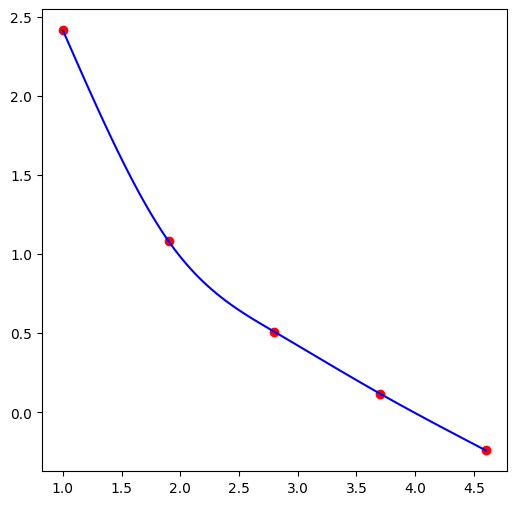

Значение в точке X*: 0.5677413514650418


In [34]:
countPoint = 100
X = np.linspace(X_i[0], X_i[-1], num = countPoint)
Y = [S(x, a, b, c, d, X_i) for x in X]

triple_spline_plot(X_i, f_i, X, Y)
print(f"Значение в точке X*: {S(task_function_value_point_2, a, b, c, d, X_i)}")

### Часть 3_3

#### Задание: 
Для таблично заданной функции путем решения нормальной системы МНК найти приближающие многочлены a) 1-ой  и б) 2-ой степени. Для каждого из приближающих многочленов вычислить сумму квадратов ошибок. Построить графики приближаемой функции и приближающих многочленов.

| i      | 0       |	1	| 2      |	3     |	4	   |    5   |
|:------:|:------: |:------:|:------:|:------:|:------:|:------:|
| xi     |1.0      |	1.9	|2.8     |	3.7	  |4.6     |	5.5 |
| yi     | 2.4142	|1.0818|	0.50953|	0.11836|	-0.24008|	-0.66818

In [35]:
X_i = [1.0, 1.9, 2.8, 3.7, 4.6, 5.5]
Y_i = [2.4142, 1.0818, 0.50953, 0.11836, -0.24008, -0.66818]

Нормальная система МНК
$$\sum^N_{j=0}y_jx^k_j, \quad k = 0,1,...,n$$

In [36]:
def mnk_func(x,a):
    result = 0
    for i, ai in enumerate(a):
        result += ai * (x ** i)
    return result

In [37]:
class Pol:
    def __init__(self, k, Xi, Yi):
        self.F = np.empty(shape=(len(Xi), k + 1))
        for j, x in enumerate(Xi):
            ph = []
            for i in range(k + 1):
                ph.append(x**i)
            self.F[j] = ph

        self.G = np.dot(self.F.T, self.F)
        self.z = np.dot(self.F.T, np.array(Yi))
    
    def Get_a(self):
        self.a = solve(self.G, self.z)
        return self.a
    
    def SumSqEr(self, Xi, Yi,f):                  
        sum = 0
        for i, y in enumerate(Yi): 
            sum += (y - f(Xi[i],self.a))**2
        return sum

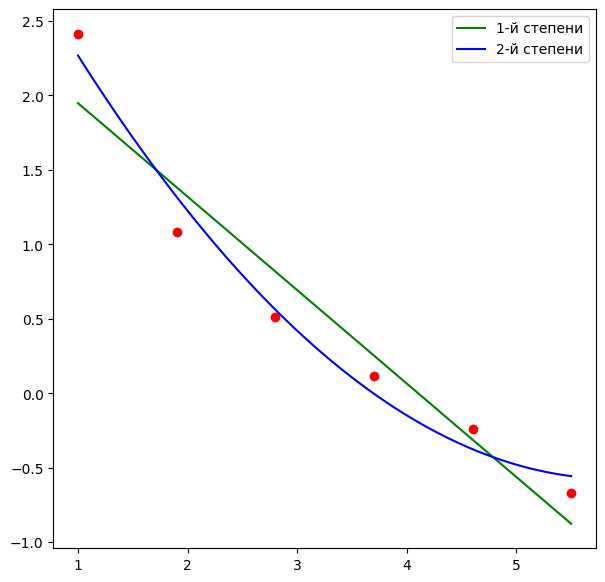

Сумма квадратов ошибок для приближающего многочлена 1-й степени:  0.4701221112819048
Сумма квадратов ошибок для приближающего многочлена 2-й степени:  0.12595314327714316


In [38]:
pol1 = Pol(1, X_i, Y_i)
a1 = pol1.Get_a()

pol2 = Pol(2, X_i, Y_i)
a2 = pol2.Get_a()

X = np.linspace(X_i[0], X_i[-1], 100)
Y1 = [mnk_func(x, a1) for x in X]
Y2 = [mnk_func(x, a2) for x in X]

def Plot3(Xi, Yi, X, Y1, Y2, l1 = '', l2 = ''):
    fig = plt.figure(figsize= (7, 7))
    plt.scatter(Xi, Yi, c = 'r')
    plt.plot(X, Y1, c = 'g', label = l1)
    plt.plot(X, Y2, c = 'b', label = l2)
    plt.legend()
    plt.show()

Plot3(X_i, Y_i, X, Y1, Y2, "1-й степени", "2-й степени")

print("Сумма квадратов ошибок для приближающего многочлена 1-й степени: ", pol1.SumSqEr(X_i, Y_i, mnk_func))
print("Сумма квадратов ошибок для приближающего многочлена 2-й степени: ", pol2.SumSqEr(X_i, Y_i, mnk_func))

### Часть 3_4

#### Задание: 
Вычислить первую и вторую производную от таблично заданной функции yi = f(xi), i = 0, 1, 2, 3, 4 в точке X*. 

| i | 0 |	1	| 2 |	3 |	4	|
|:------:|:------:|:------:|:------:|:------:|:------:|
| xi |0.0	|0.1|   	0.2	|0.3  | 	0.4|
| yi | 1.0|	1.1052	|1.2214|	1.3499|	1.4918|

$$ X^{*} = 0.2 $$

In [39]:
Xi = [0.0, 0.1, 0.2, 0.3, 0.4]
Yi = [1.0, 1.1052, 1.2214, 1.3499, 1.4918]
XX = 0.2

$$\phi '(x) = \frac{y_{i+1} - y_i}{x_{i+1} - x_i} = const$$
$$\phi''(x) = 2\frac{\frac{y_{i+2} - y_{i+1}}{x{i+2} - x_{i+1}} - \frac{y_{i+1} - y_{i}}{x{i+1} - x_{i}}}{x_{i+2} - x_i}$$

In [40]:
def approximation_left_right(x, X,Y):
    ind = -1
    for i in range(len(X)):
        if X[i] > x:
            ind = i - 1
            break

    p_left = (Y[ind] - Y[ind - 1]) / (X[ind] - X[ind - 1])
    p_right = (Y[ind + 1] - Y[ind]) / (X[ind + 1] - X[ind])

    return p_left, p_right, ind

def P1(x,X,Y):
    p_left, p_right, ind = approximation_left_right(x,X,Y)
    return p_left + (p_right - p_left) * (x - X[ind - 1] + x - X[ind]) /  (X[ind + 1] - X[ind - 1])

def P2(x,X,Y):
    p_left, p_right, ind = approximation_left_right(x,X,Y)
    return (p_right - p_left) * 2 /  (X[ind + 1] - X[ind - 1])

In [41]:
print("Первая производная в точке X* : ", P1(XX,Xi,Yi))
print("Вторая производная в точке X* : ", P2(XX,Xi,Yi))

Первая производная в точке X* :  1.223500000000001
Вторая производная в точке X* :  1.23


In [42]:
def plotter(Xi, Yi, X, Y, t1 = ''):
    fig = plt.figure(figsize= (6, 6))
    plt.scatter(Xi, Yi, c = 'r')
    plt.plot(X, Y, c = 'b')
    plt.title(t1)
    plt.show()

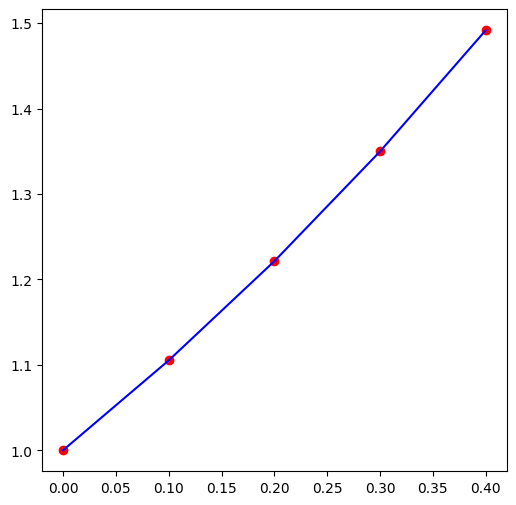

In [43]:
plotter(Xi, Yi, Xi, Yi)

### Часть 3_5

#### Задание: 
Вычислить определенный интеграл, методами прямоугольников, трапеций, Симпсона с шагами h1, h2 . Оценить погрешность вычислений, используя  Метод Рунге-Ромберга: 

$$\int_{X_0}^{X_1} y \,dx$$

$$ y = \frac{3x+4}{(2x + 7)}$$
$$ X_{0} = -2 \ \ \  X_{k} = 2$$
$$ h_{1} = 1.0 \ \ \  h_{2} = 0.5$$

In [44]:
task_function_5 = lambda x : (3*x + 4)/(2*x + 7)
X0 = -2
Xk = 2
h1 = 1.0
h2 = 0.5

Метод прямоугольника

In [45]:
def rectangle_method(x0, xk, h):
    intg = 0
    xi = x0
    while (xi < xk):
        intg += task_function_5(xi) * h
        xi += h
    return intg 

print(f"c шагом {h1}: ", rectangle_method(X0, Xk, h1))

print(f"c шагом {h2}: ", rectangle_method(X0, Xk, h2))

c шагом 1.0:  0.8825396825396825
c шагом 0.5:  1.3558531746031748


Метод трапеций

In [46]:
def trapezoida_method(x0, xk, h):
    intg = 0
    xi = x0
    while (xi < xk):
        intg += (task_function_5(xi) + task_function_5(xi + h)) * h / 2
        xi += h
    return intg

print(f"c шагом {h1}: ", trapezoida_method(X0, Xk, h1))

print(f"c шагом {h2}: ", trapezoida_method(X0, Xk, h2))

c шагом 1.0:  1.6704184704184706
c шагом 0.5:  1.7497925685425686


Метод Симпсона

Формула симпсона с шагом интегрирования $h_i = h, i = 1,2,...,N$ принимает вид
$$F \approx \frac{h}{3} [ f_0 + 4f_{1/2} + 2f_1 + 4f_{3/2} + 2f_2 + ... + 2f_{N-1} + 4f_{N-1/2} + f_N]$$

In [47]:
def simpson_method(x_min, x_max, h, f):
    X = np.arange(x_min, x_max+h/2, h/2)

    result = f(X[0]) + f(X[len(X)-1])
    for i in range(1,len(X)-1):
        result += 2*(1+i%2) * f(X[i])
    # так как мы уменьшаем шаг в 2 раза, то нужно делить не на 3, а на 6
    return result * h / 6

print(f"c шагом {h1}: ", simpson_method(X0, Xk, h1, task_function_5))

print(f"c шагом {h2}: ", simpson_method(X0, Xk, h2, task_function_5))

c шагом 1.0:  1.7762506012506012
c шагом 0.5:  1.777252130251356


Оценка погрешности


In [48]:
def runge_romberg_method(x0, xk, h, r, num):
    if num == 1:
        p = 1
        return (rectangle_method(x0, xk, h) - rectangle_method(x0, xk, h * r)) / (r ** p - 1)
    elif num == 2:
        p = 2
        return (trapezoida_method(x0, xk, h) - trapezoida_method(x0, xk, h * r)) / (r ** p - 1)
    elif num == 3:
        p = 4
        return (simpson_method(x0, xk, h, task_function_5) - simpson_method(x0, xk, h * r,task_function_5)) / (r ** p - 1)

print("Метод прямоугольников:")
print(f"Для шага {h1} (апостериорная оценка): ", runge_romberg_method(X0, Xk, h1, 2, 1))
print(f"Для шага {h2} (апостериорная оценка): ", runge_romberg_method(X0, Xk, h2, 2, 1))

print("\nМетод трапеций:")
print(f"Для шага {h1} (апостериорная оценка): ", runge_romberg_method(X0, Xk, h1, 2, 2))
print(f"Для шага {h2} (апостериорная оценка): ", runge_romberg_method(X0, Xk, h2, 2, 2))

print("\nМетод Симпсона:")
print(f"Для шага {h1} (апостериорная оценка): ", runge_romberg_method(X0, Xk, h1, 2, 3))
print(f"Для шага {h2} (апостериорная оценка): ", runge_romberg_method(X0, Xk, h2, 2, 3))

Метод прямоугольников:
Для шага 1.0 (апостериорная оценка):  1.073015873015873
Для шага 0.5 (апостериорная оценка):  0.47331349206349227

Метод трапеций:
Для шага 1.0 (апостериорная оценка):  0.0950456950456952
Для шага 0.5 (апостериорная оценка):  0.02645803270803267

Метод Симпсона:
Для шага 1.0 (апостериорная оценка):  0.0007190957190957193
Для шага 0.5 (апостериорная оценка):  6.676860005031908e-05
